<center><h2>Analysis of NBA Finals</h2></center>

<p>
The web site of the [Basketball Reference](https://www.basketball-reference.com/playoffs/2009-nba-finals-magic-vs-lakers.html) contains
an archive of basketball statistics. 
</p>

<p>
Our group wanted to analyze the NBA finals from 2009-2013. Looking at wins/losses as opposed to playing at home or away. 
</p>

<p>
The data is organized by showing the result of that particular finals matchup, overall score (W-L), then a game by game break down of the series and the restult, we are also able to identify which team is home and which is away. 
</p> 
<p>
The format of the URL required some maniupulation to be able to extract the data since the string was different for each finals year, it was based on the teams in the series. Our team used a list with the URLs of each year of the NBA finals and looped through that list to download the data. We decided that we wanted to have the ability to look at the entire webpage for our data extration. 
</p>

<center><h3>Collecting Data</h3></center>
<p>
As a team we are downloading urls from each year between 2009 and 2013 NBA finals. We are appending the URL to a list. It then saves the files as 'year'.html... we then altered it to save as Data/'year'.html because it is being saved to the data folder and it is easier to read which year it applies to.
</p>

In [21]:
from urllib.request import Request, urlopen
import time
import random

url_list = []
    
url = 'https://www.basketball-reference.com/playoffs/2009-nba-finals-magic-vs-lakers.html'
url_list.append(url)
url = 'https://www.basketball-reference.com/playoffs/2010-nba-finals-celtics-vs-lakers.html'
url_list.append(url)
url = 'https://www.basketball-reference.com/playoffs/2011-nba-finals-mavericks-vs-heat.html'
url_list.append(url)
url = 'https://www.basketball-reference.com/playoffs/2012-nba-finals-heat-vs-thunder.html'
url_list.append(url)
url = 'https://www.basketball-reference.com/playoffs/2013-nba-finals-spurs-vs-heat.html'
url_list.append(url)


for url in url_list:
    


    print ('Download from :', url)
    
    
    year = url.split('/')[-1].split('-')[0]
    

    
    #download
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()



    fileout = 'Data/'+year+'.html'
    print ('Save to : ', fileout, '\n')

    #save file to disk
    f = open(fileout,'w')
    f.write(html.decode('utf-8'))
    f.close()
    
    #make it automactic
    
URLS = []
URLS.append('url1')

Download from : https://www.basketball-reference.com/playoffs/2009-nba-finals-magic-vs-lakers.html
Save to :  Data/2009.html 

Download from : https://www.basketball-reference.com/playoffs/2010-nba-finals-celtics-vs-lakers.html
Save to :  Data/2010.html 

Download from : https://www.basketball-reference.com/playoffs/2011-nba-finals-mavericks-vs-heat.html
Save to :  Data/2011.html 

Download from : https://www.basketball-reference.com/playoffs/2012-nba-finals-heat-vs-thunder.html
Save to :  Data/2012.html 

Download from : https://www.basketball-reference.com/playoffs/2013-nba-finals-spurs-vs-heat.html
Save to :  Data/2013.html 



 <center><h2>Filtering and Extracing Data</h2></center>
<br>
<p>
We are importing numerous python libraries which allow us to manipulate the data into what we would like to pull from the html files. 
</p>
<p>
We then created a function that extracts the home and visiting teams with their corresponding points from a specific html file relating to that year. We then created a for loop to finds the home team and visiting team points along with the names of each team. 
</p>
<p>
We created two lists called v_points and h_points. The visiting team's points and home team's points are separated and appended to them 
</p>

In [22]:
from bs4 import BeautifulSoup
import glob
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline 
from scipy import stats

def extract_points (filename):
    
    soup = BeautifulSoup(open(filename).read(), 'lxml')
    matchdays=soup.find_all('table', attrs={'class': 'teams'})
    
    v_points, h_points = [], []
    
    for x in matchdays:
    
        teams = x.find_all('tr')
        visitor = teams[1]
        home = teams[2]

        visitor_name = visitor.find_all('td')[0].get_text()
        visitor_points = visitor.find_all('td')[1].get_text()
 
        home_name = home.find_all('td')[0].get_text()
        home_points = home.find_all('td')[1].get_text()
      
        h_points.append(int(home_points))
        v_points.append(int(visitor_points))
  
        print (visitor_name, visitor_points, ' - ',home_points, home_name)
    
    
    return v_points, h_points





<p>We added an example that extracted and printed the points and scores for the 2009 NBA files. We did this to make sure it ran correctly before we went ahead and extracted and printed the information for all of the NBA Finals files.</p>

In [23]:
filename = 'Data/2009.html' 

v_points, h_points = extract_points (filename)
print (v_points)
print (h_points)

Orlando Magic 75  -  100 Los Angeles Lakers
Orlando Magic 96  -  101 Los Angeles Lakers
Los Angeles Lakers 104  -  108 Orlando Magic
Los Angeles Lakers 99  -  91 Orlando Magic
Los Angeles Lakers 99  -  86 Orlando Magic
[75, 96, 104, 99, 99]
[100, 101, 108, 91, 86]




<p>We continued to make a dictionary which houses all the winning points by year in one dictionary and corresponding losing points by year in another dictionary.</p>

<p>We extracted the files and information like in the example above except on a larger scale for 2009 - 2013.</p>

In [24]:
v_points , h_points = {}, {}

for y in range (2009, 2014):
  
    filename = 'Data/'+str(y)+'.html' 

    v_points[y] , h_points[y] = extract_points (filename)

print (v_points)
print (h_points)

Orlando Magic 75  -  100 Los Angeles Lakers
Orlando Magic 96  -  101 Los Angeles Lakers
Los Angeles Lakers 104  -  108 Orlando Magic
Los Angeles Lakers 99  -  91 Orlando Magic
Los Angeles Lakers 99  -  86 Orlando Magic
Boston Celtics 89  -  102 Los Angeles Lakers
Boston Celtics 103  -  94 Los Angeles Lakers
Los Angeles Lakers 91  -  84 Boston Celtics
Los Angeles Lakers 89  -  96 Boston Celtics
Los Angeles Lakers 86  -  92 Boston Celtics
Boston Celtics 67  -  89 Los Angeles Lakers
Boston Celtics 79  -  83 Los Angeles Lakers
Dallas Mavericks 84  -  92 Miami Heat
Dallas Mavericks 95  -  93 Miami Heat
Miami Heat 88  -  86 Dallas Mavericks
Miami Heat 83  -  86 Dallas Mavericks
Miami Heat 103  -  112 Dallas Mavericks
Dallas Mavericks 105  -  95 Miami Heat
Miami Heat 94  -  105 Oklahoma City Thunder
Miami Heat 100  -  96 Oklahoma City Thunder
Oklahoma City Thunder 85  -  91 Miami Heat
Oklahoma City Thunder 98  -  104 Miami Heat
Oklahoma City Thunder 106  -  121 Miami Heat
San Antonio Spurs 92

<center><h2>Home and Visiting Team's Points</h2></center>
<br>
<p>
We inserted the home and visiting team's scores from the NBA Finals through 2009-2013. The code we used converted our information into a scatter plot. 
</p>

<p>
With that, we changed the <b>x-axis</b> to represent the home team's points scored and the <b>y-axis</b> to represent the away team's points. 
</p>

<p>
Each year and game is represented by a specific symbol and color. (Ex. 2009 finals games are represented by a red "o" marker and 2010 is represented by a black ">" (triangle) marker)
.</p>

<p>
Lastly, we added a line of best fit which is represented by a dotted red line. A black line is also in there that shows the team are more likely to win the game if they are below it, which seems to mostly be the home team.
</p>

alpha :  57.098296199213635
beta :  0.36318625309450997
correlation coefficient :  0.3405987291000408


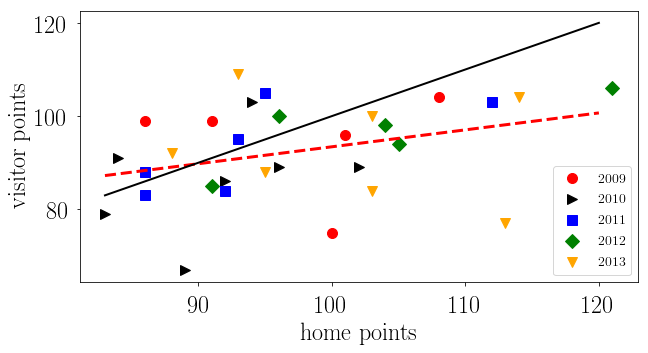

In [25]:
h_data, v_data = [], []
for y in h_points:
    for i in range(0, len(h_points[y])):
        h_data.append(h_points[y][i])
        v_data.append(v_points[y][i])


slope, intercept, r_value, p_value, std_err = stats.linregress(h_data,v_data)
print ('alpha : ', intercept)
print ('beta : ', slope)
print ('correlation coefficient : ', r_value)



colors = {}
markers = {}

colors[2009] = 'red'
colors[2010] = 'black'
colors[2011] = 'blue'
colors[2012] = 'green'
colors[2013] = 'orange'

markers[2009] = 'o'
markers[2010] = '>'
markers[2011] = 's'
markers[2012] = 'D'
markers[2013] = 'v'




plt.figure(figsize=(10,5))
plt.rc('text', usetex=True)

plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})

plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8


for y in h_points:

    plt.plot(h_points[y],v_points[y], marker=markers[y], color =colors[y], markersize=10, linewidth=0, label = str(y))


best_fit_x = np.arange(min(h_data), max(h_data), 1)
best_fit_y = intercept + slope * best_fit_x

plt.plot(best_fit_x, best_fit_y, color ='red', linewidth=3, linestyle='dashed')
         
plt.plot(best_fit_x, best_fit_x, color = 'black', linewidth=2)

plt.legend(loc='lower right', fontsize = 14)

plt.ylabel('visitor points')
plt.xlabel('home points')

plt.show()

<center><h2>Point Differential to Total Points</h2></center>
<br>
<p>
We inserted the total points scored and the point differential per game from the NBA Finals through 2009-2013. The code we used converted our information into a scatter plot. 
</p>

<p>
With that, we changed the <b>x-axis</b> to represent the total points scored and the <b>y-axis</b> to represent the point differential. 
</p>

<p>
What we got out of this graph is that it is basically showing that if there are more total points scored for the game, then the point differential is going to be lower. 
.</p>

<p>
Each game/year is represented by different colors and symbols, the same as the graph above. 
</p>

<p>
Lastly, we added a line of best fit that is a red dotted line.
</p>

alpha :  11.014951940192244
beta :  -0.006407974368102553
correlation coefficient :  -0.01384527142840275


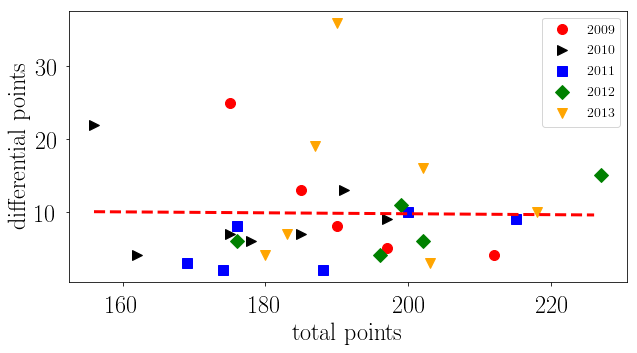

In [26]:
tot_data, diff_data = [], []
for y in h_points:
    for i in range(0, len(h_points[y])):
      
        tot_data.append(h_points[y][i]+v_points[y][i])

        diff_data.append(abs(h_points[y][i]-v_points[y][i]))


slope, intercept, r_value, p_value, std_err = stats.linregress(tot_data,diff_data)
print ('alpha : ', intercept)
print ('beta : ', slope)
print ('correlation coefficient : ', r_value)



colors = {}
markers = {}

colors[2009] = 'red'
colors[2010] = 'black'
colors[2011] = 'blue'
colors[2012] = 'green'
colors[2013] = 'orange'

markers[2009] = 'o'
markers[2010] = '>'
markers[2011] = 's'
markers[2012] = 'D'
markers[2013] = 'v'




plt.figure(figsize=(10,5))
plt.rc('text', usetex=True)

plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})

plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8


for y in h_points:
    
    tot , diff = [], []
    for i in range(0, len(h_points[y])):
        tot.append(h_points[y][i]+v_points[y][i])
        diff.append(abs(h_points[y][i]-v_points[y][i]))



    plt.plot(tot,diff, marker=markers[y], color =colors[y], markersize=10, linewidth=0, label = str(y))


best_fit_x = np.arange(min(tot_data), max(tot_data), 1)
best_fit_y = intercept + slope * best_fit_x

plt.plot(best_fit_x, best_fit_y, color ='red', linewidth=3, linestyle='dashed')
         

plt.legend(loc='upper right', fontsize = 14)

plt.ylabel('differential points')
plt.xlabel('total points')

plt.show()

<center><h2>Second Set of Figures and Visualizations</h2></center>
<br>
<p>
We inserted the visiting team's scores from the NBA Finals through 2009-2013. The code we used converted our information into a "step line chart". 
</p>

<p>
With that, we changed the <b>x-axis</b> to represent the total points scored and the <b>y-axis</b> to represent the cumulative fraction of visiting teams total ponts. 
</p>

<p>
We changed the size of the graph and the text font on both the X and Y axis. Also changing the colors of the home team's line to <b><span style="color: red;">Red</span></b> and the visiting team's line to <b><span style="color: blue;">Blue</span></b>
.</p>

<p>
We repeated the same steps except this time with the home team's scores.
</p>

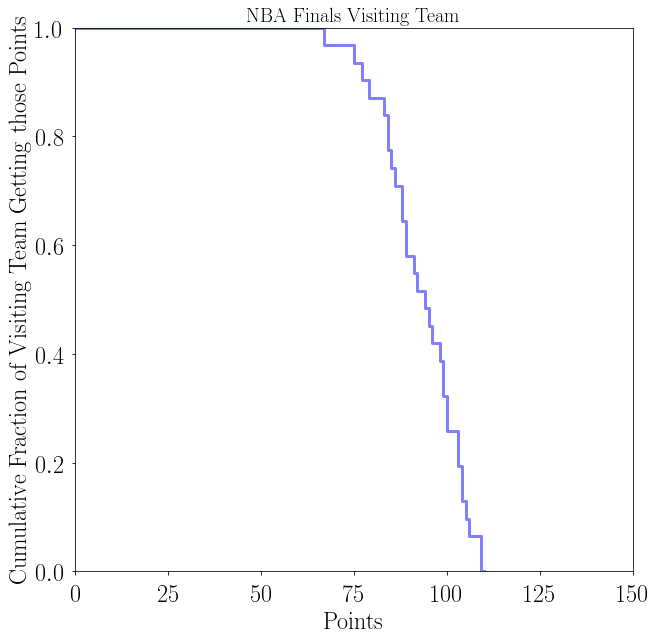

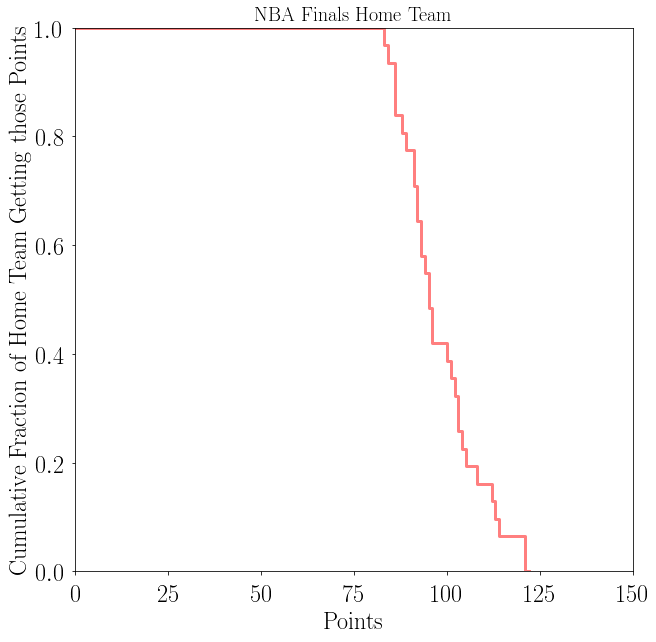

In [37]:
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

#####################################


#--------------------------------------------------------------------------------
#-------------------------------------------------The First Visualization--------
#--------------------------------------------------------------------------------


def measure_probability_distribution (outcomes):
    
    average_value = 0.0
    variance = 0.0
    
    pdf = {}
    norm = 0.0
    
    ##count number of observations
    for x in outcomes:
        if x not in pdf:
            pdf[x] = 0.0
        pdf[x] += 1.0
        norm += 1.0
        
        average_value += x
        variance += x*x
        
        
    average_value /= norm
    variance /= norm
    variance = variance - average_value * average_value
    std_dev = np.sqrt(variance) 
        
    ##normalize pdf
    for x in pdf:
        pdf[x] /= norm
    
    
    return pdf, average_value, std_dev
#####################################

def cumulative_from_data (data):
    sorted_data = sorted(data)
    x = []
    cx = []
    
    ##for visualization purposes
    x.append(0)
    cx.append(1)
    
    norm = 0.0
    for n in sorted_data:
        x.append(n)
        cx.append(1.0-norm/float(len(sorted_data)+1.0))
        norm = norm + 1.0
        x.append(n)
        cx.append(1.0-norm/float(len(sorted_data)+1.0))
        
        
    ##for visualization purposes
    x.append(n)
    cx.append(0)
    x.append(n+1)
    cx.append(0)
        
    return x, cx


###################################


x, Cx = cumulative_from_data (v_data)


plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8


title = 'NBA Finals Visiting Team'

plt.title(title, fontsize = 20)


plt.xlabel('Points')
plt.ylabel('Cumulative Fraction of Visiting Team Getting those Points')

    

plt.plot(x, Cx, color = 'blue', linewidth= 3, markersize = 0, alpha=0.5)

plt.xlim(0, 150)
plt.ylim(0,1)



plt.show()

#--------------------------------------------------------------------------------
#-----------------------------------------------The Seocond Visualization--------
#--------------------------------------------------------------------------------


def measure_probability_distribution (outcomes):
    
    average_value = 0.0
    variance = 0.0
    
    pdf = {}
    norm = 0.0
    
    ##count number of observations
    for x in outcomes:
        if x not in pdf:
            pdf[x] = 0.0
        pdf[x] += 1.0
        norm += 1.0
        
        average_value += x
        variance += x*x
        
        
    average_value /= norm
    variance /= norm
    variance = variance - average_value * average_value
    std_dev = np.sqrt(variance)
        
    ##normalize pdf
    for x in pdf:
        pdf[x] /= norm
    
    
    return pdf, average_value, std_dev
#####################################

def cumulative_from_data (data):
    sorted_data = sorted(data)
    x = []
    cx = []
    
    ##for visualization purposes
    x.append(0)
    cx.append(1)
    
    norm = 0.0
    for n in sorted_data:
        x.append(n)
        cx.append(1.0-norm/float(len(sorted_data)+1.0))
        norm = norm + 1.0
        x.append(n)
        cx.append(1.0-norm/float(len(sorted_data)+1.0))
        
        
    ##for visualization purposes
    x.append(n)
    cx.append(0)
    x.append(n+1)
    cx.append(0)
        
    return x, cx


###################################

x, Cx = cumulative_from_data (h_data)


plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8


title = 'NBA Finals Home Team'

plt.title(title, fontsize = 20)


plt.xlabel('Points')
plt.ylabel('Cumulative Fraction of Home Team Getting those Points')


plt.plot(x, Cx, color = 'red', linewidth= 3, markersize = 0, alpha=0.5)

plt.xlim(0, 150)
plt.ylim(0,1)



plt.show()

<center><h2>Combined Step Line Chart</h2></center>

<p>
For combining the charts, we added "1"s to the end of the the set of x and Cx which allowed us to separate the home and away lines when generated.
</p>

<p>
We then created a legend to distinguish the lines between home and away.
</p>

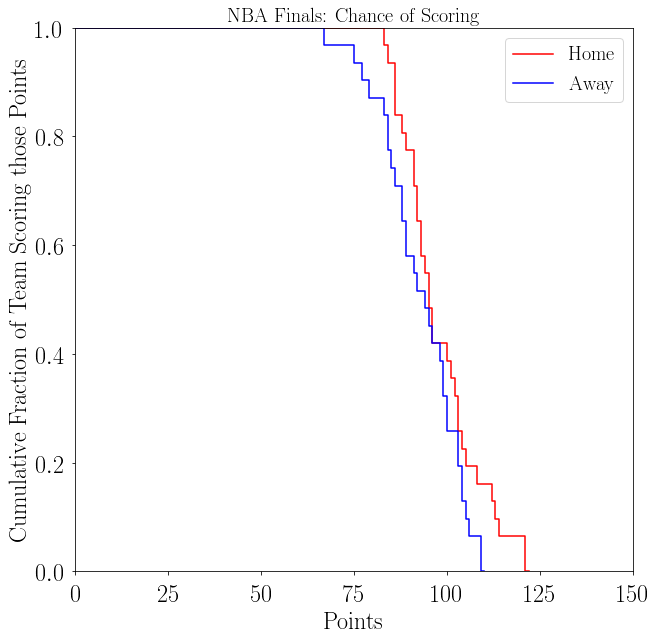

In [36]:
from scipy import stats
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np


def measure_probability_distribution (outcomes):
    
    average_value = 0.0
    variance = 0.0
    
    pdf = {}
    norm = 0.0
    
    ##count number of observations
    for x in outcomes:
        if x not in pdf:
            pdf[x] = 0.0
        pdf[x] += 1.0
        norm += 1.0
        
        average_value += x
        variance += x*x
        
        
    average_value /= norm
    variance /= norm
    variance = variance - average_value * average_value
    std_dev = np.sqrt(variance) 
        
    ##normalize pdf
    for x in pdf:
        pdf[x] /= norm
    
    
    return pdf, average_value, std_dev
#####################################

def cumulative_from_data (data):
    sorted_data = sorted(data)
    x1 = []
    cx1 = []
    
    ##for visualization purposes
    x1.append(0)
    cx1.append(1)
    
    norm = 0.0
    for n in sorted_data:
        x1.append(n)
        cx1.append(1.0-norm/float(len(sorted_data)+1.0))
        norm = norm + 1.0
        x1.append(n)
        cx1.append(1.0-norm/float(len(sorted_data)+1.0))
        
        
    ##for visualization purposes
    x1.append(n)
    cx1.append(0)
    x1.append(n+1)
    cx1.append(0)
        
    return x1, cx1

    sorted_data = sorted(data)
    x = []
    cx = []
    
    ##for visualization purposes
    x.append(0)
    cx.append(1)
    
    norm = 0.0
    for n in sorted_data:
        x.append(n)
        cx.append(1.0-norm/float(len(sorted_data)+1.0))
        norm = norm + 1.0
        x.append(n)
        cx.append(1.0-norm/float(len(sorted_data)+1.0))
        
        
    ##for visualization purposes
    x.append(n)
    cx.append(0)
    x.append(n+1)
    cx.append(0)
        
    return x, cx


###################################


x1, Cx1 = cumulative_from_data (v_data)
x, Cx = cumulative_from_data (h_data)


plt.figure(figsize=(10,10))
plt.rc('text', usetex=True)
plt.rc('font', size=24, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8


title = 'NBA Finals: Chance of Scoring'

plt.title(title, fontsize = 20)


plt.xlabel('Points')
plt.ylabel('Cumulative Fraction of Team Scoring those Points')

    
plt.xlim(0, 150)
plt.ylim(0,1)


plt.plot(x,Cx, label="Home", color='red')
plt.plot(x1,Cx1, label="Away", color ='blue')

plt.legend(loc='upper right', fontsize = 20)

plt.show()

<center><h2>----Conclusion----</h2></center>
<br>
<p>
<b>A brief description of your implementation</b>
</p>

<p>
- We took the data from the visiting team and home team scores from the NBA Finals from the years 2009-2013. With those scores, we created a step line chart. This chart shows shows the cumulative probability fraction of the visiting team (for the first graph) and the home team (for the second graph) of scoring a certain amount of points which is located on the x axis.
</p>

<p>
<b>A brief text containing your interpretation about the visualizations. This can include considerations on the functional form of the distribution, average value, variance, etc..</b>
</p>
<p>
- While interpreting both of the scatter plots, the first graph on Home and Visiting team points we plotted each score for each of the NBA Final games for the home and away teams. The red line shows the line of best fit, and the black line shows us which team is most likely to win with the score they have. From this graph, we concluded that the home team is more likely to win.
In our second graph, we compared the point differential to total points. We added up the totl points from each game and then plotted them with the correct point differential. From the graph, we were able to conclude that when there is a small differential in points, there is more likely to be more points scored in the game.
</p>
<p>
- While interpreting both graphs, we can see that there is a higher cumulative fraction of the home team scoring more points than the visiting team. Meaning, the home team has about a 100% chance of scoring at least 90 points, and the away team has about a 100% chance of scoring at least more than 65 points. From these step chart graphs we can also conclude that the home team has a higher chance of scoring more points than the away team. There are many factors that can contribute to a home team scoring more but we just wanted to see what the distribution of scores looked like. 
</p>